## Uniaxial-Material tester for OpenSees -- by Silvia Mazzoni
### Last Modified 4/16/2021 by SM

### using:
### How to Add a Uniaxial Material to OpenSees
### Michael H. Scott
### December 15/14, 2020


In [9]:
import openseespy.opensees as ops
import numpy as np
import matplotlib.pyplot as plt

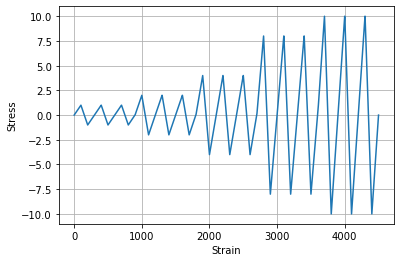

array([ 0.        ,  0.01010101,  0.02020202, ..., -0.2020202 ,
       -0.1010101 ,  0.        ])

In [10]:
def defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles):
    strain = []
    for thisPeak in peaksArray:
        for i in range(nCycles):
            strain = np.append(strain,np.linspace(0,thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak*scaleFactor,-thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(-thisPeak*scaleFactor,0,nSteps))

    plt.plot(strain)
    plt.grid()
    plt.xlabel('Strain')
    plt.ylabel('Stress')
    plt.show()
    return strain


peaksArray=[1,2,4,8,10]
scaleFactor = 1
nSteps = 100
nCycles = 3
strainHistory=defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles)
strainHistory

### Plot stress-strain response using UniaxialMaterial tester

Also available in Tcl

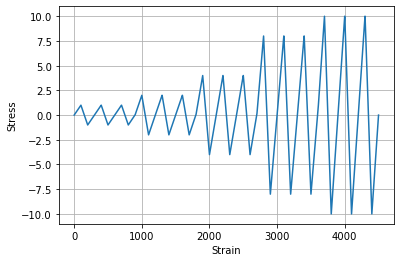

Text(0, 0.5, 'Stress')

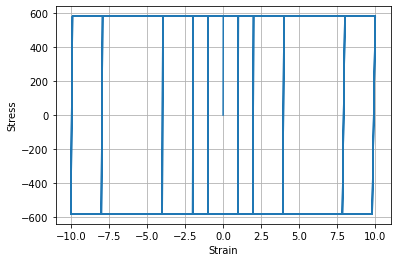

In [11]:
ops.wipe()
materialTag = 0

##### my first material:
E = 290000
epsy = 0.002

materialTag = materialTag + 1
ops.uniaxialMaterial('ElasticPP',materialTag,E,epsy)

strain=defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles)


ops.testUniaxialMaterial(materialTag)
stress = []
for eps in strain:
    ops.setStrain(eps)
    stress.append(ops.getStress())
    tangent = ops.getTangent() # Not used
    
plt.plot(strain,stress)
plt.grid()
plt.xlabel('Strain')
plt.ylabel('Stress')


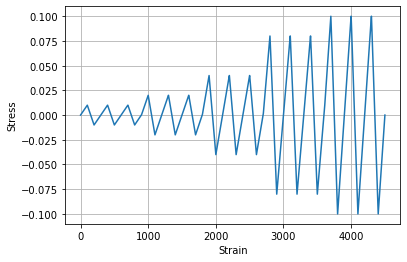

Text(0, 0.5, 'Stress')

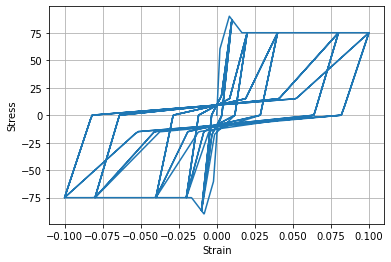

In [12]:

##### my first material:
E = 290000
epsy = 0.002

materialTag = materialTag + 1

pinchX = 0.8
pinchY =0.2
damage1 = 0
damage2 =0
beta = 0.5
ops.uniaxialMaterial('Hysteretic', materialTag, 60,60/29000, 60*1.5,4*60/29000, 60*1.25,8*60/29000, -60,-60/29000, -60*1.5,-4*60/29000, -60*1.25,-8*60/29000, pinchX, pinchY, damage1, damage2, beta)
strain=defineStrainHistory(peaksArray,0.01,nSteps,nCycles)


ops.testUniaxialMaterial(materialTag)
stress = []
for eps in strain:
    ops.setStrain(eps)
    stress.append(ops.getStress())
    tangent = ops.getTangent() # Not used
    
plt.plot(strain,stress)
plt.grid()
plt.xlabel('Strain')
plt.ylabel('Stress')


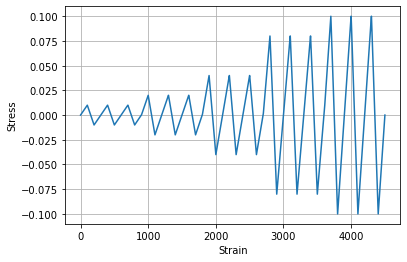

Text(0, 0.5, 'Stress')

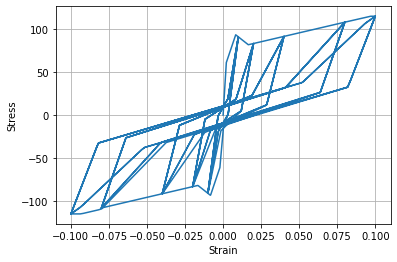

In [13]:
##### my first material:
ops.wipe()
E = 290000
epsy = 0.002

pinchX = 0.8
pinchY =0.2
damage1 = 0
damage2 =0
beta = 0.5
ops.uniaxialMaterial('Steel01',1,40,60/29000*200000,0.005)     #  bilinear behavior for flexure
ops.uniaxialMaterial('Hysteretic', 2, 60,60/29000, 60*1.5,4*60/29000, 60*1.25,8*60/29000, -60,-60/29000, -60*1.5,-4*60/29000, -60*1.25,-8*60/29000, pinchX, pinchY, damage1, damage2, beta)

materialTag = 3
ops.uniaxialMaterial('Parallel', materialTag,1,2)
ops.uniaxialMaterial('Parallel', 4,1,2)

strain=defineStrainHistory(peaksArray,0.01,nSteps,nCycles)


ops.testUniaxialMaterial(4)
stress = []
for eps in strain:
    ops.setStrain(eps)
    stress.append(ops.getStress())
    tangent = ops.getTangent() # Not used
    
plt.plot(strain,stress)
plt.grid()
plt.xlabel('Strain')
plt.ylabel('Stress')

### Questions?

Ask now, e-mail me, or visit Portwood Digital [blog](https://www.portwooddigital.com)

Big thank you to Erkan Bicici for helping today!